<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-Custo-do-Plano-de-Saude/blob/main/Prevendo_Custo_do_Plano_de_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo _Custo do Plano de Saúde_**

---



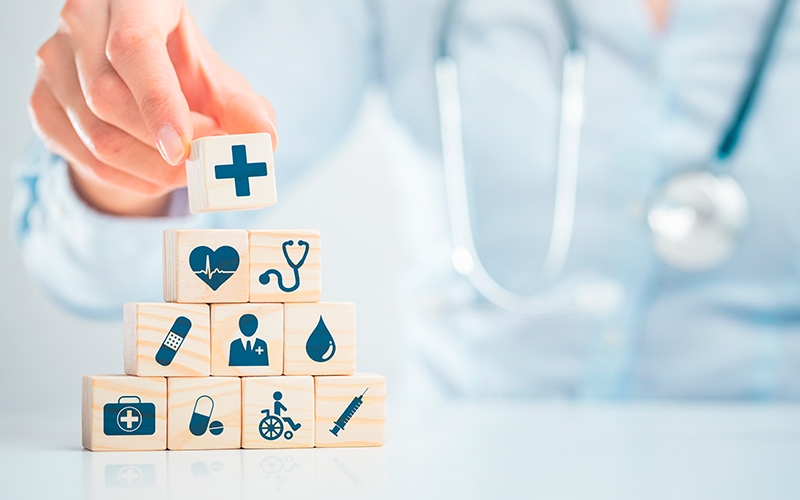

**Contextualizando**

Conforme `ANS` (Agência Nacional de Saúde Suplementar), o Brasil totalizou em setembro de 2021 cerca de _[48.529.575](http://www.ans.gov.br/anstabnet/cgi-bin/tabnet?dados/tabnet_br.def)_ usuários de plano de saúde. Pórem, aproximadamente _60% da população_ **não possuem** cobertura de plano de saúde.<br>
O mercado de planos de saúde no Brasil é bastante maduro e possui muitas empresas com diversos tipos de convênios para pessoas físicas e jurídicas.



**Descrição do problema**

Desenvolver um modelo preditivo para estimar o valor do plano de saúde para um determinado cliente e seus dependentes, dado alguns atributos.

## **Importando e realizando análise exploratória dos dados**

In [1]:
# importando o conjunto de dados
!wget https://raw.githubusercontent.com/FGalvao77/datasets/main/insurance.csv

--2021-12-28 19:41:31--  https://raw.githubusercontent.com/FGalvao77/datasets/main/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2021-12-28 19:41:31 (4.89 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



In [1]:
# visualizando o conjunto de dados
!head insurance.csv

61,female,29.1,0,yes,northwest,29141.36

In [2]:
# importando as bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

In [3]:
# instanciando o conjunto de dados na variável "data"
data = pd.read_csv('insurance.csv')
data.sample(5) # visualizando 5 amostras aleatórias

,age,sex,bmi,children,smoker,region,expenses
359,18,female,20.8,0,no,southeast,1607.51
808,18,male,30.1,0,no,southeast,1131.51
57,18,male,31.7,2,yes,southeast,34303.17
1097,22,male,33.8,0,no,southeast,1674.63
620,30,male,31.4,1,no,southwest,3659.35


In [4]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> **Dicionário de dados:**<br>
- `age`: idade;
- `sex`: sexo;
- `bmi`: imc (índice de massa corporal);
- `smoker`: é fumante;
- `region`: região;
- `children:` possui filhos;
- `expenses`: total de despesas.

In [5]:
# visualizando se há dados nulos
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
# se por acaso houvessem valores nulos, iríamos elimina-los
data.dropna(inplace=True)

In [7]:
# estatística descritiva dos dados
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
# visualizando as variáveis do tipo "object"
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
# bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

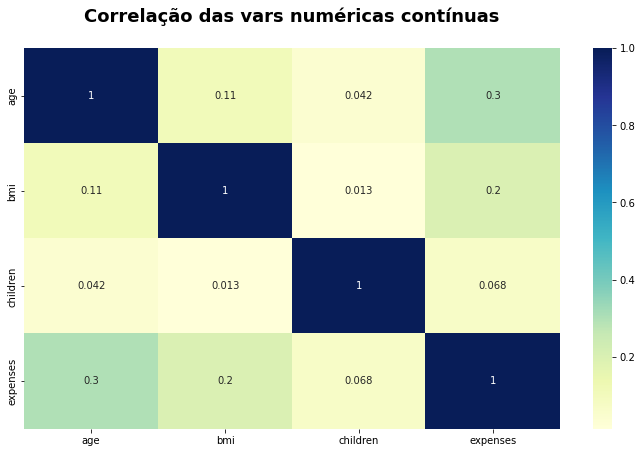

In [14]:
# correlação das variáveis numéricas do conjunto de dados
plt.figure(figsize = (12,7))
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'})
plt.show();

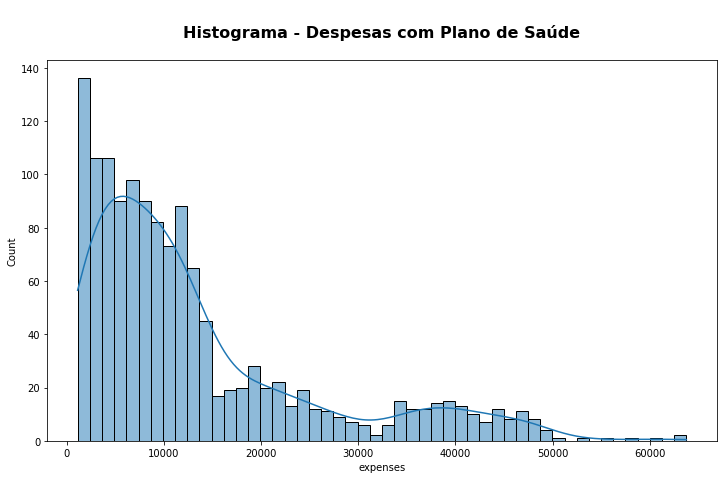

In [15]:
# histograma da variável alvo
plt.figure(figsize=(12,7))

sns.histplot(data=data['expenses'], bins=50, kde=True)
plt.title('\nHistograma - Despesas com Plano de Saúde\n', fontsize=16, fontweight='bold')
# plt.grid()
plt.show();

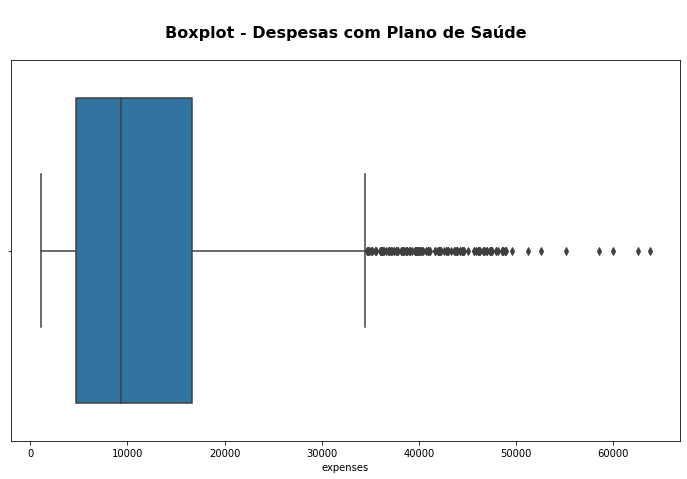

In [16]:
# boxplot da variável alvo
plt.figure(figsize=(12,7))

sns.boxplot(data=data, x='expenses')
plt.title('\nBoxplot - Despesas com Plano de Saúde\n', 
          fontsize=16, fontweight='bold')
plt.show();

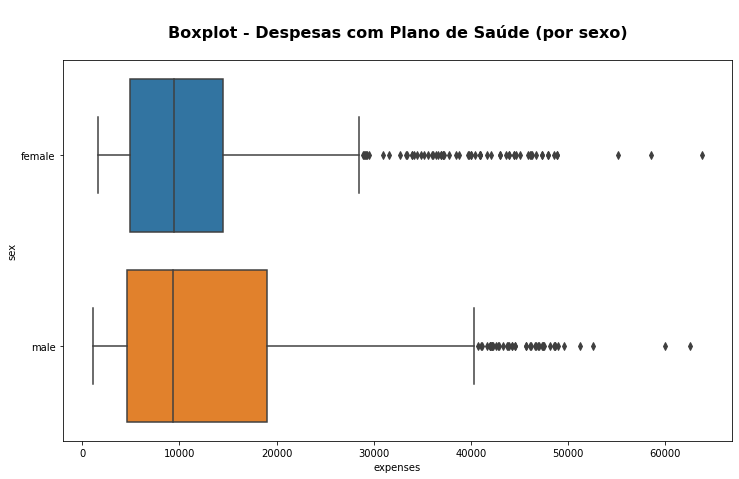

In [17]:
# boxplot da variável alvo por sexo
plt.figure(figsize=(12,7))

sns.boxplot(data=data, x='expenses', y='sex')
plt.title('\nBoxplot - Despesas com Plano de Saúde (por sexo)\n', 
          fontsize=16, fontweight='bold')
plt.show();

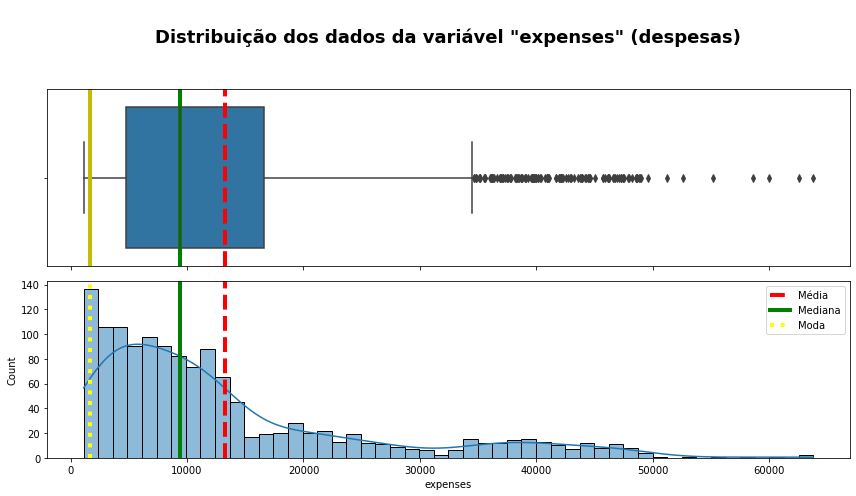

In [18]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável alvo "'expenses"
mean = data['expenses'].mean()
median = data['expenses'].median()
mode = data['expenses'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (12,7))

sns.boxplot(data=data, x='expenses', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "expenses" (despesas)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=data, x='expenses', ax=ax_hist, bins=50, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

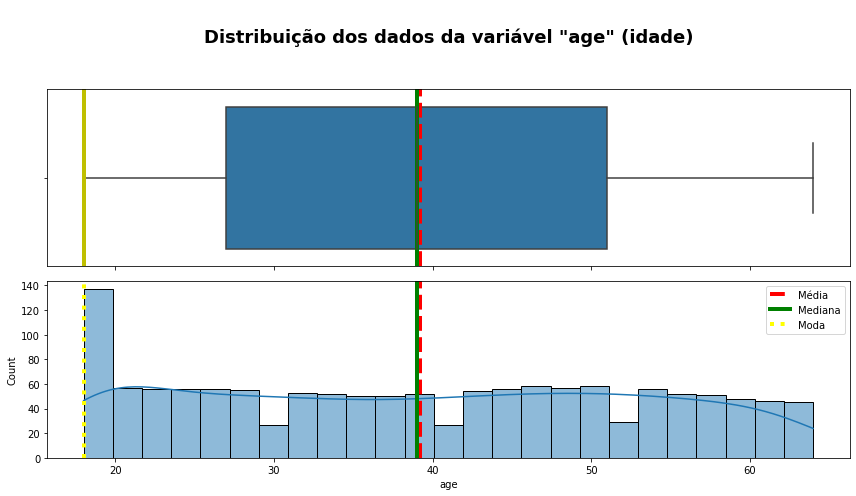

In [21]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "age"
mean = data['age'].mean()
median = data['age'].median()
mode = data['age'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (12,7))

sns.boxplot(data=data, x='age', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "age" (idade)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=data, x='age', bins=25, ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

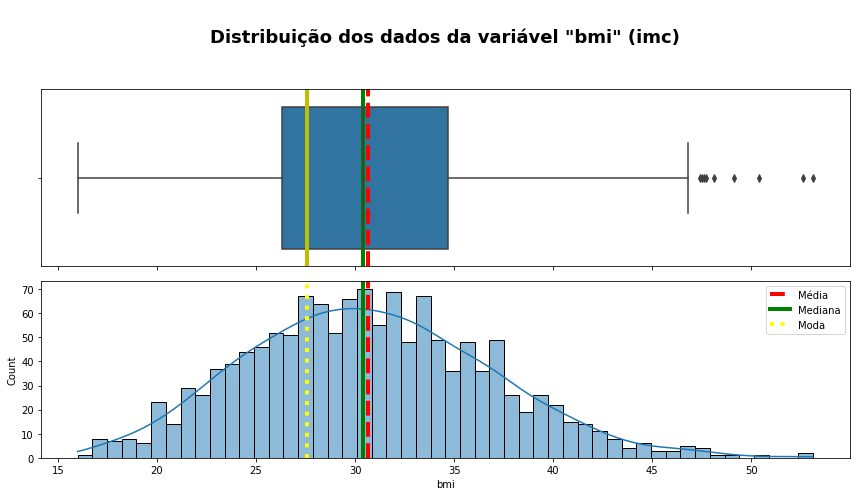

In [22]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "bmi"
mean = data['bmi'].mean()
median = data['bmi'].median()
mode = data['bmi'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (12,7))

sns.boxplot(data=data, x='bmi', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "bmi" (imc)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=data, x='bmi', bins=50, ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

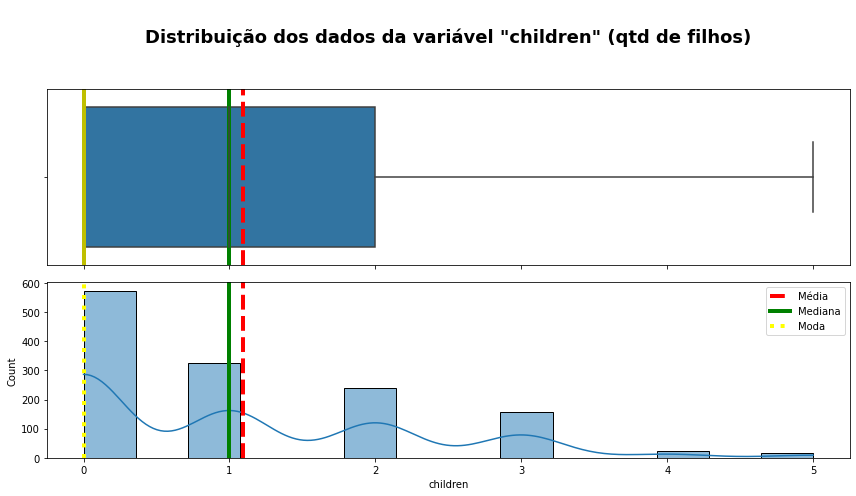

In [23]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "children"
mean = data['children'].mean()
median = data['children'].median()
mode = data['children'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (12,7))

sns.boxplot(data=data, x='children', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "children" (qtd de filhos)\n\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=data, x='children', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

male      676
female    662
Name: sex, dtype: int64

male      0.505232
female    0.494768
Name: sex, dtype: float64




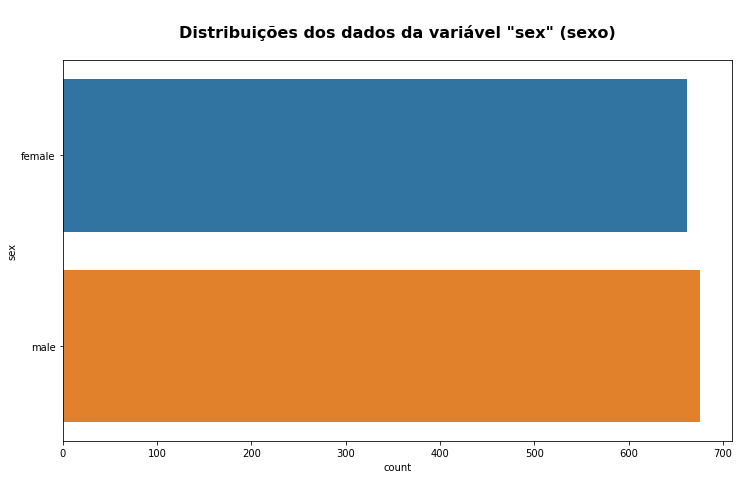

In [24]:
# visualizando a distribuição dos dados da variável "sex"
print(
    f'{data.sex.value_counts()}',
    f'{data.sex.value_counts(normalize=True)}',
    sep='\n\n'
)
print('\n')

plt.figure(figsize=(12,7))

plt.title('\nDistribuições dos dados da variável "sex" (sexo)\n', 
          fontsize=16, fontweight='bold')
sns.countplot(data=data, y=data['sex'])
plt.show();

no     1064
yes     274
Name: smoker, dtype: int64

no     0.795217
yes    0.204783
Name: smoker, dtype: float64




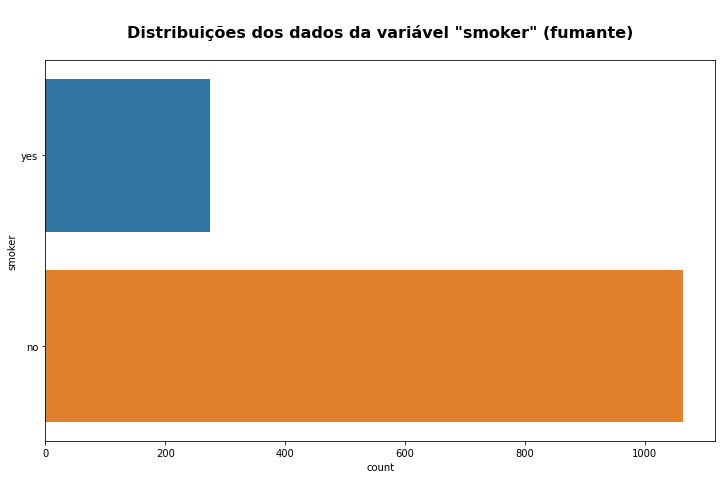

In [25]:
# visualizando a distribuição dos dados da variável "smoker"
print(
    f'{data.smoker.value_counts()}',
    f'{data.smoker.value_counts(normalize=True)}',
    sep='\n\n'
)
print('\n')

plt.figure(figsize=(12,7))

plt.title('\nDistribuições dos dados da variável "smoker" (fumante)\n', 
          fontsize=16, fontweight='bold')
sns.countplot(data=data, y=data['smoker'])
plt.show();

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64




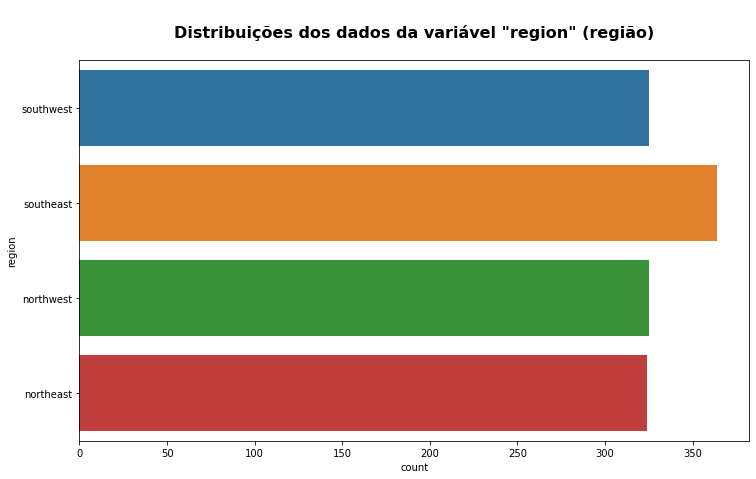

In [26]:
# visualizando a distribuição dos dados da variável "region"
print(
    f'{data.region.value_counts()}',
    f'{data.region.value_counts(normalize=True)}',
    sep='\n\n'
)
print('\n')

plt.figure(figsize=(12,7))

plt.title('\nDistribuições dos dados da variável "region" (região)\n', 
          fontsize=16, fontweight='bold')
sns.countplot(data=data, y=data['region'])
plt.show();

## **Pré-processamento dos dados**

In [27]:
# visualizando as 5 primeiras linhas do conjunto de dados
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [28]:
# formatando a exibição de apenas uma casa decimal após o ponto
data['expenses'] = round(data['expenses'])
data  # visualizando o conjunto de dados

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16885.0
1,18,male,33.8,1,no,southeast,1726.0
2,28,male,33.0,3,no,southeast,4449.0
3,33,male,22.7,0,no,northwest,21984.0
4,32,male,28.9,0,no,northwest,3867.0
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10601.0
1334,18,female,31.9,0,no,northeast,2206.0
1335,18,female,36.9,0,no,southeast,1630.0
1336,21,female,25.8,0,no,southwest,2008.0


In [29]:
# relaizando "one-hot" nas variáveis categóricas
data = pd.get_dummies(data, drop_first=True)

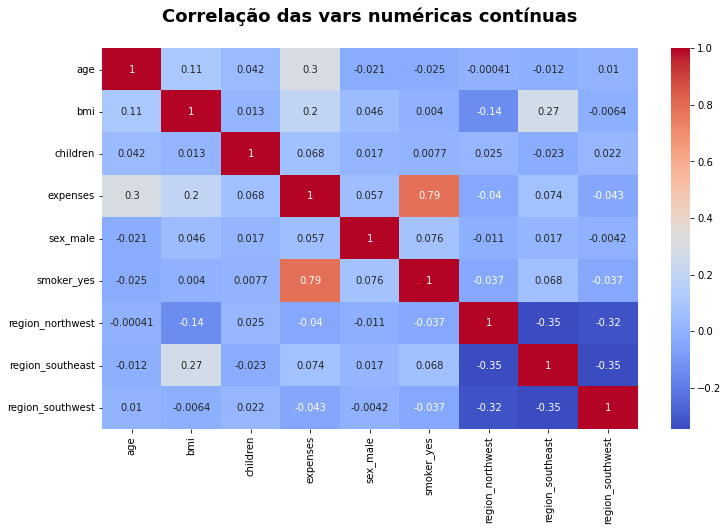

In [30]:
# correlação das variáveis numéricas do conjunto de dados
plt.figure(figsize = (12,7))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

In [31]:
# nomes das colunas (atributos)
data.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [32]:
# reorganizando a disposição dos atributos
data = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 
             'region_southeast', 'region_southwest', 'expenses']]

# visualizando as 5 primeiras linhas
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,expenses
0,19,27.9,0,0,1,0,0,1,16885.0
1,18,33.8,1,1,0,0,1,0,1726.0
2,28,33.0,3,1,0,0,1,0,4449.0
3,33,22.7,0,1,0,1,0,0,21984.0
4,32,28.9,0,1,0,1,0,0,3867.0


In [33]:
# instanciando as variáveis explicativas e a resposta
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# dimensão das variáveis
print(X.shape, y.shape)

(1338, 8) (1338,)


In [27]:
# # instanciando as variáveis explicativas e a resposta
# X = data.drop('expenses', axis=1)
# y = data['expenses']

# # dimensão das variáveis
# print(X.shape, y.shape)

In [34]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [35]:
# particionando os dados em treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.3,
                                                random_state=42)

In [36]:
# contabilizando a quantidade de dados nas variáveis
len(Xtrain), len(Xtest), len(ytrain), len(ytest)

(936, 402, 936, 402)

## **Construção e Avaliação do modelo**

### **Regressão linear**

In [37]:
# função de regressão linear
from sklearn.linear_model import LinearRegression

In [38]:
# instanciando o modelo de regressão linear e treinando-o com os dados de treino
regLinear_model = LinearRegression().fit(Xtrain, ytrain)
regLinear_model

LinearRegression()

In [39]:
# realizando as predições com o modelo após seu treinamento com os dados de teste
ypred_regLinear = regLinear_model.predict(Xtest)
ypred_regLinear[:10]  # visualizando as 10 primeiras predições

array([ 9023.66528984,  7011.94023062, 36873.98821156,  9502.35359347,
       26966.03253755, 11081.77475725,   -47.10774949, 17189.64452532,
         976.24815089, 11333.09723279])

In [40]:
# funções para avaliar o modelo
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# visualizando o coeficinete de determinação (R2) e o erro médio quadrático (mse - mean_squared_error) do modelo
print(
    f'R2 score: {r2_score(ytest, ypred_regLinear)}',
    f'MSE: {mean_squared_error(ytest, ypred_regLinear)}',
    sep='\n'                       
)

R2 score: 0.769636470379107
MSE: 33776763.743057415


### **Regressão Ridge**

In [42]:
# função de regressão ridge
from sklearn.linear_model import Ridge

In [43]:
# instanciando o modelo de regressão ridge e treinando-o com os dados de treino
regRidge_model = Ridge(random_state=42).fit(Xtrain, ytrain)
regRidge_model

Ridge(random_state=42)

In [44]:
# realizando as predições com o modelo após seu treinamento com os dados de teste
ypred_regRidge = regRidge_model.predict(Xtest)
ypred_regRidge[:10]   # visualizando as 10 primeiras predições

array([ 9.04477709e+03,  7.03802902e+03,  3.67424553e+04,  9.53701766e+03,
        2.68476359e+04,  1.11166679e+04, -1.55218569e+01,  1.72138562e+04,
        1.00071880e+03,  1.13662997e+04])

In [39]:
# visualizando o coeficinete de determinação (R2) e o erro médio quadrático (mse - mean_squared_error) do modelo
print(
    f'R2 score: {r2_score(ytest, ypred_regRidge)}',
    f'MSE: {mean_squared_error(ytest, ypred_regRidge)}',
    sep='\n'                       
)

R2 score: 0.7693797777434144
MSE: 33814400.978971615


### **Regressão Lasso**

In [45]:
# função de regressão lasso
from sklearn.linear_model import Lasso

In [46]:
# instanciando o modelo de regressão lasso e treinando-o com os dados de treino
regLasso_model = Lasso().fit(Xtrain, ytrain)
regLasso_model

Lasso()

In [47]:
# realizando as predições com o modelo após seu treinamento com os dados de teste
ypred_regLasso = regLasso_model.predict(Xtest)
ypred_regLasso[:10]   # visualizando as 10 primeiras predições

array([ 9015.38452893,  7019.48317854, 36876.37037678,  9505.70067486,
       26964.07798613, 11082.77534319,   -37.81919627, 17191.78864138,
         970.8543374 , 11335.76821921])

In [48]:
# visualizando o coeficinete de determinação (R2) e o erro médio quadrático (mse - mean_squared_error) do modelo
print(
    f'R2 score: {r2_score(ytest, ypred_regLasso)}',
    f'MSE: {mean_squared_error(ytest, ypred_regLasso)}',
    sep='\n'                       
)

R2 score: 0.7696383046572084
MSE: 33776494.79433026


### **Random Forest**

In [49]:
# função de floresta aleatória
from sklearn.ensemble import RandomForestRegressor

In [50]:
# instanciando o modelo de floresta aleatória e treinando-o com os dados de treino
randForest_model = RandomForestRegressor(random_state=42).fit(Xtrain, ytrain)
randForest_model

RandomForestRegressor(random_state=42)

In [51]:
# realizando as predições com o modelo após seu treinamento com os dados de teste
ypred_randForest = randForest_model.predict(Xtest)
ypred_randForest[:10]   # visualizando as 10 primeiras predições

array([ 9318.43,  5814.26, 28296.69, 11980.29, 34553.53,  7319.35,
        2350.26, 14362.86,  5870.41, 10430.63])

In [52]:
# visualizando o coeficinete de determinação (R2) e o erro médio quadrático (mse - mean_squared_error) do modelo
print(
    f'R2 score: {r2_score(ytest, ypred_randForest)}',
    f'MSE: {mean_squared_error(ytest, ypred_randForest)}',
    sep='\n'                       
)

R2 score: 0.8531650075969659
MSE: 21529496.68627189


In [53]:
# função de boosting
from xgboost import XGBRegressor

In [54]:
# instanciando o modelo de boosting e treinando-o com os dados de treino
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42).fit(Xtrain, ytrain)
xgb_model

XGBRegressor(objective='reg:squarederror', random_state=42)

In [55]:
# realizando as predições com o modelo após seu treinamento com os dados de teste
ypred_xgb = xgb_model.predict(Xtest)
ypred_xgb[:10]   # visualizando as 10 primeiras predições

array([10387.528 ,  5887.1855, 29341.62  ,  9987.257 , 34171.91  ,
        4075.1492,  2405.9028, 15829.071 ,  3815.9346, 11047.706 ],
      dtype=float32)

In [56]:
# visualizando o coeficinete de determinação (R2) e o erro médio quadrático (mse - mean_squared_error) do modelo
print(
    f'R2 score: {r2_score(ytest, ypred_xgb)}',
    f'MSE: {mean_squared_error(ytest, ypred_xgb)}',
    sep='\n'                       
)

R2 score: 0.866489158785863
MSE: 19575859.72158052


## **Salvando o melhor modelo para `deploy`**

In [57]:
# biblioteca para salvar o modelo
import pickle as pk

In [58]:
# instanciando o modelo do arquivo
filename = 'medicalInsuranceCost.pkl'

# salvando o modelo que apresentou melhor performance
pk.dump(XGBRegressor(objective='reg:squarederror'), open(filename, 'wb'))